# Natural Language Processing and Sentiment Analysis Modelling

### 1. Regular Expressions

Useful operation for filtering long strings of text by specific words or patterns. Useful for finding variations of a word such as 'quick', 'quickly', 'quicker', 'quickest'. Can all be found with the Regular Expression: 'quick(er|ly|est)?'

Test, Experiment and Debug with Regular Expressions here: https://regex101.com/


### 2. Natural Language Processing and EDA

Experiment with a trained lexicon and rule-based sentiment analysis tool specifically attuned to sentiments expressed in social media. It is used for text analysis to determine the sentiment of text data, whether positive, negative, or neutral. VADER is popular due to its simplicity and effectiveness, especially in contexts where the text is short and may use informal language, including slang, emojis, and abbreviations common in social media, online reviews, and similar platforms.


### 3. Building your own Sentiment Analysis model

However, a robust model like Vader has been trained to pick up on generalised and informal language on a diverse range of topics. It may negatively assoiciate the word "cheesy" with negative sentiment. But this would be inaccurate for gauging the sentiment of 'Cheese Toasties' or 'Pizza', where 'Cheesy' is often used in a positive reference.

The same is the case with Banking. The term "stable interest" may be fairly neutral in vader, but may exist in your dataset as being most often assoiciated with positive reviews. Building your own Sentiment model trained on your own dataset, will lead to a model more tuned to your customers' feedback language.


Reading Material: https://www.datacamp.com/tutorial/simplifying-sentiment-analysis-python

Data Source: https://www.kaggle.com/datasets/aistct/amazonfood

## 1. Regular Expressions

In [69]:
#import libraries

import pandas as pd

filepath = r'C:\Users\Yobi-Work\Documents\LBG\Sprint 2\NLP\Amazon Food Reviews\Amazon Food Reviews Sample\Amazon_food_filtered_1_5.csv'

df = pd.read_csv(filepath)
df

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,5,Great taffy,Great taffy at a great price. There was a wid...
3,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
4,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
...,...,...,...
30061,1,Not what I expected.,I certainly could do better by these if I just...
30062,5,Great!!,Table is 35 inches in height. It is heavy dut...
30063,5,Black tea v Coca Cola,I have been one of those people that always fe...
30064,1,Never Received the product,I was charged for this product by Liquid Natio...


In [70]:
#drop empty rows
df=df.dropna()

In [71]:
# Filter the reviews for mentions of Cats, 
# as a rough way of estimaitng whether reviews include pet food
# A simple though Inefficient looping function

import re

count=0

cat_reviews=[] # to gather the reviews in a list
p = re.compile(r'.*\s[Cc]ats?\s.*') # pattern to find cat/Cats

for review in df.Text: # loop through the reviews
    cat_reviews += p.findall(str(review)) 

In [72]:
cat_reviews

["Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too",
 "My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat.",
 "I had heard a little about this product from the local pet store, then tried a small bag for our 2 cats of about 3 and 6 years respectively. The female, younger one took to it right away, and the older male, who was unfortunately weaned on the junk cat food with all the corn meal and etc... in it, and would usually refuse a diet change, actually liked it too. The older male is overweight and we were trying to switch him to soft food on the doctor's reque

In [73]:
len(cat_reviews)

933

## Efficient filtering of reviews that match regex pattern

In [74]:
# Filter and grab all rows in dataframe that match the Regular Expression.
# Much more efficient

df_cats = df[df.Text.str.match(r'.*\s[Cc]ats?\s.*')]
df_nocats = df[~df.Text.str.match(r'.*\s[Cc]ats?\s.*')]

#Quick Check

print( "Reviews that mention a Cat: {}".format(len(df_cats)) )
print( "Reviews without a mention of a Cat: {}".format(len(df_nocats)) )

Reviews that mention a Cat: 933
Reviews without a mention of a Cat: 29133


In [75]:
#Can also be done to filter for mentions of the UK?

df_UK = df[df.Text.str.match(r'.*\s[Uu]k?\s.*')]
df_noUK = df[~df.Text.str.match(r'.*\s[Uu][Kk]\s.*')]

#Quick Check

print( "Reviews that mention the UK: {}".format(len(df_UK)) )
print( "Reviews without a mention of the UK: {}".format(len(df_noUK)) )

Reviews that mention the UK: 46
Reviews without a mention of the UK: 30038


## Using Regular Expressions to replace strings -  

Changing Candy to Sweets, this ought to homogenise different terms for confectionaries in the data
We wouldnt want Candy to be treated differently to Sweets by our model. Our model may end up ignoring both if the frquencies are two low for each. its sensible to merge this. 

This is a manual method for Lemmatisation, where words like 'quick', 'quickly', 'quicker' are generalised to the word 'quick', making it a more likely for us to catch as an informative feature

In [76]:
#needs clearer iterator

p=re.compile(r'[Cc]andy | [Cc]andies ') # find the pattern you want to replace

sweet_reviews=[]

for i in df.Text:
    sweet_reviews.append(p.sub(' Sweets ', i))
sweet_reviews

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
 'Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.',
 "This saltwater taffy had great flavors and was very soft and chewy.  Each  Sweets was individually wrapped well.  None of the Sweets were stuck together, which did happen in the expensive version, Fralinger's.  Would highly recommend this candy!  I served it at a beach-themed party and everyone loved it!",
 'This taffy is so good.  It is very soft and chewy.  The flavors are amazing.  I 

In [77]:
# using replace instead of sub, good performance, not as flexibile as regex
p=re.compile(r'\s[Cc]andy?(ies)?\s')

sweet_reviews2=[]

for i in df.Text:
    if p.search(i):
        r=i.replace('candy', 'sweet')
        r=r.replace('candies', 'sweets')
        r=r.replace('chewy', 'chewtastic')
        sweet_reviews2.append(r)
sweet_reviews2

["This saltwater taffy had great flavors and was very soft and chewtastic.  Each sweet was individually wrapped well.  None of the sweets were stuck together, which did happen in the expensive version, Fralinger's.  Would highly recommend this sweet!  I served it at a beach-themed party and everyone loved it!",
 "I can remember buying this sweet as a kid and the quality hasn't dropped in all these years. Still a superb product you won't be disappointed with.",
 'The sweet is just red , No flavor . Just  plan and chewtastic .  I would never buy them again',
 'This bag of sweet online is pretty expensive, it should be cheaper in order to compete with grocery stores, other than that, its a good combination of my favorite sweet',
 "These Albanese gummi bears and rings and so on are very good and tasty and high quality. The bears even have little faces. At my local sweet store this type of gummi stuff (bears, rings, snakes, balls, worms, whatever) are about $10/lb. These twin packs of 4.5 o

In [78]:
# no. of reviews with Candy/Candies, that were replaced.
len(sweet_reviews2)

495

---------------------------------------------------------------------------


## Before you proceed, 

### You should review Naive Bayes for NLP and Sentiment Analysis.pdf

-------------

# Create a Sentiment Analysis model for Food (non-pet)

In [79]:
# Filter the data to exclude Pet food. Already discovered the Cat food, got to filter for dogs and reptiles too.
# Hopefully there arent too many hamsters, make a note of that but for now, can be considered as neglible noise, for now

In [90]:
import nltk
from nltk.classify import naivebayes

# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter

[nltk_data] Downloading package punkt to C:\Users\Yobi-
[nltk_data]     Work\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Yobi-
[nltk_data]     Work\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Yobi-
[nltk_data]     Work\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Processing Data

1. Removing Pet related reviews and duplicate rows

2. Removing Stop Words and Lemmatisation

Not Exhaustive

### 1. Removing Pet related reviews and duplicate rows

In [91]:
#df_nocats = df[~df.Text.str.match(r'.*\s[Cc]ats?\s.*')]

#df_nopets = df_nocats[~df_nocats.Text.str.match(r'.*\s[Dd]ogs?\s.*|*\s[Ll]izard?\s.*|.*\s[Pp]et?\s.*)|.*\s[Hh]amster?\s.*' )]
df_human = df_nocats[~df_nocats.Text.str.match(r'.*\s[Dd]ogs?\s.*|.*\s[Ll]izards?\s.*|.*\s[Pp]ets?\s.*|.*\s[Hh]amsters?\s.*')]

df=df_human.drop_duplicates()
df

,Score,Summary,Text
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,5,Great taffy,Great taffy at a great price. There was a wid...
3,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
4,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
7,5,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
...,...,...,...
30061,1,Not what I expected.,I certainly could do better by these if I just...
30062,5,Great!!,Table is 35 inches in height. It is heavy dut...
30063,5,Black tea v Coca Cola,I have been one of those people that always fe...
30064,1,Never Received the product,I was charged for this product by Liquid Natio...


### 2. Removing Stop Words and Lemmatisation

In [92]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_stopwords_and_lemmatize(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize the tokens
    filtered_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.isalpha()]
    # Reconstruct the text without stop words
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [93]:
# Assuming df_1 is a subset created from another DataFrame, df
df_1 = df[df['Score'] == 1].copy()

# Now when you run the function to remove stopwords and lemmatize, it should not give you the warning
df_1['Text'] = df_1['Text'].apply(remove_stopwords_and_lemmatize)

# Assuming df_1 is a subset created from another DataFrame, df
df_5 = df[df['Score'] == 5].copy()

# Now when you run the function to remove stopwords and lemmatize, it should not give you the warning
df_5['Text'] = df_5['Text'].apply(remove_stopwords_and_lemmatize)

In [94]:
print('number of 1-star non-petfood reviews {}'.format(len(df_1)))
print('number of 5-star non-petfood reviews {}'.format(len(df_5)))

number of 1-star non-petfood reviews 3161
number of 5-star non-petfood reviews 21705


In [95]:
df_1

,Score,Summary,Text
1,1,Not as Advertised,product arrived labeled jumbo salted peanut pe...
21,1,Nasty No flavor,candy red flavor plan chewy would never buy
36,1,Don't like it,oatmeal good mushy soft like quaker oat way go
44,1,stale product.,arrived day stale could eat bag
53,1,No Tea Flavor,tea flavor whole brunch artifial flavor return...
...,...,...,...
30037,1,ORDER CANCELLED,order cancelled day placing received explanati...
30051,1,Disappointing,must admit taste cooky may fantastic however p...
30056,1,Oven disaster!,amount butter used popover caused runover baki...
30061,1,Not what I expected.,certainly could better went grama house raided...


In [96]:
#tokenise each
df_1['Tokens'] = df_1['Text'].apply(word_tokenize)
df_5['Tokens'] = df_5['Text'].apply(word_tokenize)

In [97]:
df_1.head()

,Score,Summary,Text,Tokens
1,1,Not as Advertised,product arrived labeled jumbo salted peanut pe...,"[product, arrived, labeled, jumbo, salted, pea..."
21,1,Nasty No flavor,candy red flavor plan chewy would never buy,"[candy, red, flavor, plan, chewy, would, never..."
36,1,Don't like it,oatmeal good mushy soft like quaker oat way go,"[oatmeal, good, mushy, soft, like, quaker, oat..."
44,1,stale product.,arrived day stale could eat bag,"[arrived, day, stale, could, eat, bag]"
53,1,No Tea Flavor,tea flavor whole brunch artifial flavor return...,"[tea, flavor, whole, brunch, artifial, flavor,..."


# Natural Language Processing and EDA

Exploring the token frequency in 1 and 5 star reviews

In [103]:
# Flatten the list of all token lists and count the word frequencies
all_words = [word for tokens in df_1['Tokens'] for word in tokens]
word_freq = Counter(all_words)

# Get the most common words
most_common_words = word_freq.most_common()

# Print the most common words
for word, freq in most_common_words[:20]:
    print(f"{word}: {freq}")


br: 3619
like: 1625
product: 1548
taste: 1472
one: 1075
would: 1002
coffee: 839
flavor: 781
tea: 766
good: 735
box: 699
even: 634
amazon: 632
get: 617
buy: 572
bag: 551
tried: 507
could: 506
time: 487
really: 472


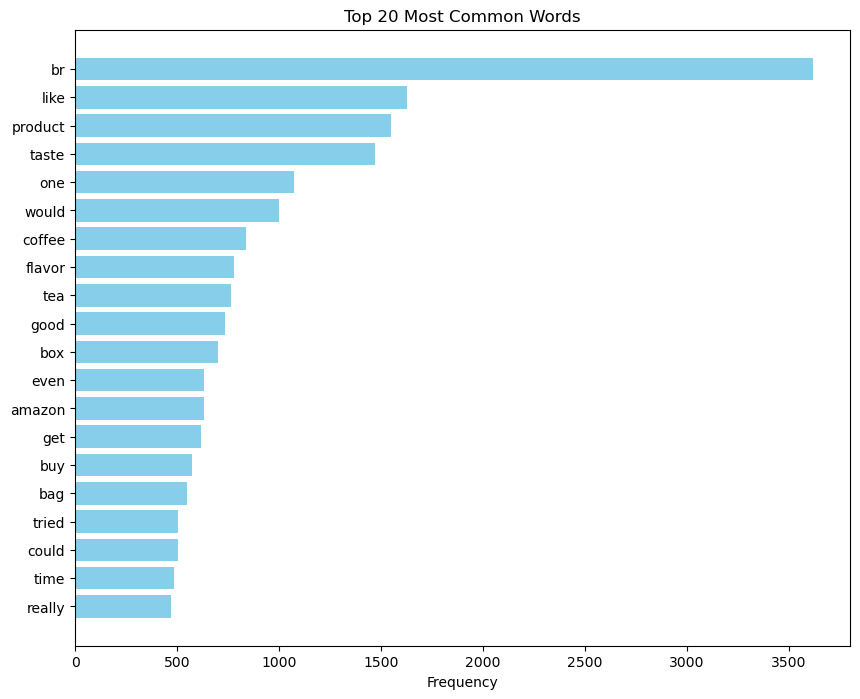

In [104]:
import matplotlib.pyplot as plt

# Assuming most_common_words contains the top N words you want to display
top_words = [word for word, freq in most_common_words[:20]]
top_freqs = [freq for word, freq in most_common_words[:20]]

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_words, top_freqs, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest values at the top
plt.show()

In [105]:
# Flatten the list of all token lists and count the word frequencies
all_words = [word for tokens in df_5['Tokens'] for word in tokens]
word_freq = Counter(all_words)

# Get the most common words
most_common_words = word_freq.most_common()

# Print the most common words
for word, freq in most_common_words[:20]:
    print(f"{word}: {freq}")


br: 19427
like: 8283
great: 7708
taste: 7213
tea: 7195
good: 7112
love: 6569
flavor: 6483
one: 6132
coffee: 6112
product: 5529
make: 4594
best: 3792
get: 3728
time: 3510
use: 3497
would: 3431
really: 3402
amazon: 3183
find: 3056


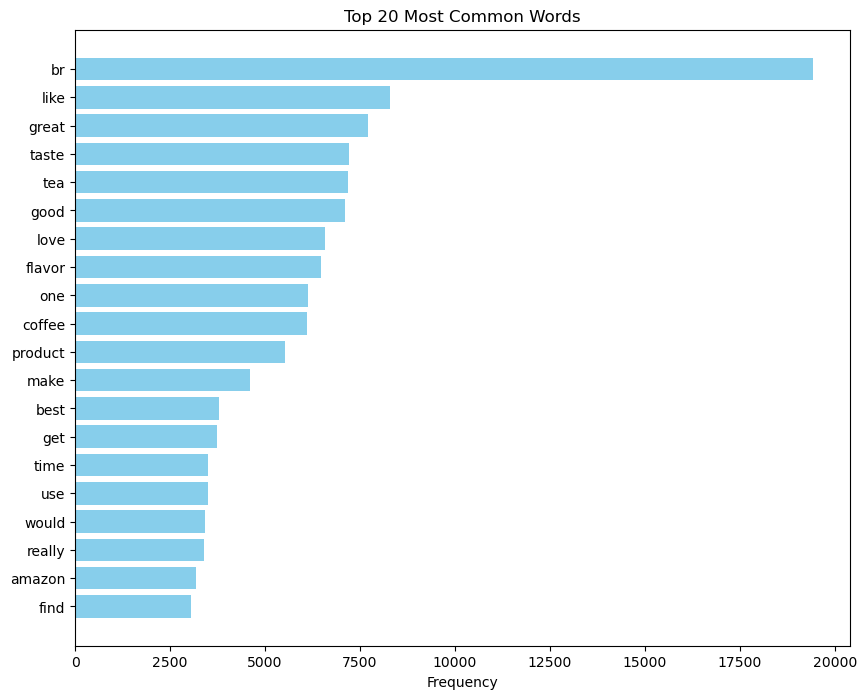

In [106]:
import matplotlib.pyplot as plt

# Assuming most_common_words contains the top N words you want to display
top_words = [word for word, freq in most_common_words[:20]]
top_freqs = [freq for word, freq in most_common_words[:20]]

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_words, top_freqs, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest values at the top
plt.show()


# Model Planning

1. Splitting the data
2. Sampling the data

In [107]:
df

,Score,Summary,Text
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,5,Great taffy,Great taffy at a great price. There was a wid...
3,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
4,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
7,5,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
...,...,...,...
30061,1,Not what I expected.,I certainly could do better by these if I just...
30062,5,Great!!,Table is 35 inches in height. It is heavy dut...
30063,5,Black tea v Coca Cola,I have been one of those people that always fe...
30064,1,Never Received the product,I was charged for this product by Liquid Natio...


## Vectoriser and TFIDF - Advanced

In [35]:
'''from sklearn.feature_extraction.text import TfidfVectorizer

# Use your custom stop words list
vectorizer = TfidfVectorizer(stop_words=stop_words)

# Initialize the TF-IDF Vectorizer
vectorizer_1 = TfidfVectorizer()
vectorizer_5 = TfidfVectorizer()

tfidf_matrix_1 = vectorizer_1.fit_transform(df_rating_1['Text'])
tfidf_matrix_5 = vectorizer_5.fit_transform(df_rating_5['Text'])

# Convert the TF-IDF matrices to DataFrames
tfidf_df_1 = pd.DataFrame(tfidf_matrix_1.toarray(), columns=vectorizer_1.get_feature_names_out())
tfidf_df_5 = pd.DataFrame(tfidf_matrix_5.toarray(), columns=vectorizer_5.get_feature_names_out())'''

# Model Building

In [108]:
#Standardise the data so there are the same sized samples of 1 and 5 rated reviews

#Sample appropriate sizes from 1's and 5's 

df_5_sample = df_5.sample(n=3000, random_state=42)
df_1_sample = df_1.sample(n=3000, random_state=42)
print('number of 1-star reviews {}'.format(len(df_1_sample)))
print('number of 5-star reviews {}'.format(len(df_5_sample)))

number of 1-star reviews 3000
number of 5-star reviews 3000


In [109]:
#concat your equally sized samples, filter to two columns, reset index
df = pd.concat([df_1_sample, df_5_sample])
df = df[['Score', 'Text']]
df = df.reset_index(drop=True)
df

,Score,Text
0,1,bought son take work lunch apparently found sm...
1,1,cayenne authentic bebere way spicy threw made
2,1,instead resealable tub jelly bean received car...
3,1,hard taste horrible almost stale fresh package...
4,1,familiar wolfgang recipe tried soup first trie...
...,...,...
5995,5,love avocado rich easy pour great tasting buy ...
5996,5,know jack link excellent product date excellen...
5997,5,favorite soup ca beat amazon price free shippi...
5998,5,puroast low acid coffee french roast excellent...


In [116]:
# Now when you run the function to remove stopwords and lemmatize, it should not give you the warning
df['Text'] = df['Text'].apply(remove_stopwords_and_lemmatize)
#tokenise each
df['Tokens'] = df['Text'].apply(word_tokenize)

In [126]:
df.Tokens[1]

['cayenne', 'authentic', 'bebere', 'way', 'spicy', 'threw', 'made']

# Model Building

In [127]:
import pandas as pd
from nltk import NaiveBayesClassifier
from nltk.classify.util import accuracy
from sklearn.model_selection import train_test_split


# Prepare the data
def document_features(token_list):
    return {token: True for token in token_list}

data = [(document_features(tokens), str(score)) for tokens, score in zip(df['Tokens'], df['Score'])]



In [129]:
# Split the data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)

# Train the classifier
clf = NaiveBayesClassifier.train(train_data)

Accuracy on the test set: 0.89


# Model Evaluation

In [153]:
from sklearn.metrics import confusion_matrix

test_actual = [label for _, label in test_data]
test_pred = [clf.classify(features) for features, _ in test_data]

# Generate the confusion matrix using sklearn
cm = confusion_matrix(test_actual, test_pred)


# You might need to explicitly define your labels
labels = sorted(set(test_actual))  # Sort labels if necessary

cm_df = pd.DataFrame(cm, index=labels, columns=labels)


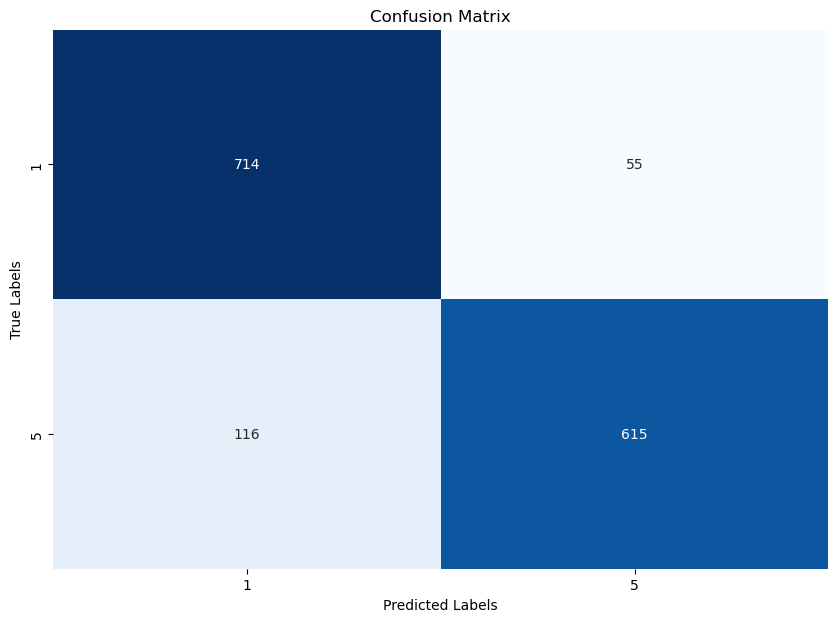

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [158]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

accuracy = accuracy_score(test_actual, test_pred)
print(f"Accuracy: {accuracy:.2f}")



report = classification_report(test_actual, test_pred)
print(report)

Accuracy: 0.89
              precision    recall  f1-score   support

           1       0.86      0.93      0.89       769
           5       0.92      0.84      0.88       731

    accuracy                           0.89      1500
   macro avg       0.89      0.88      0.89      1500
weighted avg       0.89      0.89      0.89      1500



In [141]:
# Show the most informative features
informative_features =clf.show_most_informative_features(100)

Most Informative Features
                   worst = True                1 : 5      =     68.1 : 1.0
          disappointment = True                1 : 5      =     30.8 : 1.0
                   trash = True                1 : 5      =     28.8 : 1.0
                  refund = True                1 : 5      =     26.6 : 1.0
                   shame = True                1 : 5      =     21.4 : 1.0
           disappointing = True                1 : 5      =     19.3 : 1.0
                horrible = True                1 : 5      =     16.7 : 1.0
                 garbage = True                1 : 5      =     16.6 : 1.0
                  return = True                1 : 5      =     15.7 : 1.0
                   threw = True                1 : 5      =     15.6 : 1.0
                    poor = True                1 : 5      =     15.5 : 1.0
                carrying = True                5 : 1      =     15.4 : 1.0
                  rubber = True                1 : 5      =     15.3 : 1.0

In [159]:
#Error Analysis
# collect the test reviews that the model got wrong and conduct analysis

errors = []
for (features, label), pred_label in zip(test_data, test_pred):
    if label != pred_label:
        errors.append((label, pred_label, features))

# Optionally, print or inspect some errors
for error in errors[:10]:
    print(error)


('1', '5', {'warning': True, 'package': True, 'use': True, 'popcorn': True, 'button': True, 'microwave': True, 'first': True, 'would': True, 'create': True, 'convenient': True, 'recommended': True, 'cooking': True, 'time': True, 'minute': True, 'follow': True, 'direction': True, 'middle': True, 'burnt': True, 'every': True, 'single': True, 'switching': True, 'pop': True, 'weaver': True})
('1', '5', {'idea': True, 'good': True, 'caramel': True, 'flavor': True, 'ginger': True, 'pistachio': True, 'dominated': True, 'chocolate': True, 'walnut': True, 'orange': True, 'honey': True, 'variety': True, 'missed': True, 'mix': True, 'rich': True, 'buttery': True, 'dairy': True, 'caramelized': True, 'sugar': True, 'expect': True})
('1', '5', {'paul': True, 'prudhomme': True, 'make': True, 'great': True, 'seafood': True, 'seasoning': True, 'pork': True, 'veal': True, 'found': True, 'vegetable': True, 'spicy': True})
('5', '1', {'high': True, 'end': True, 'stuff': True, 'got': True, 'box': True, 'tr

## Now the fun part

In [173]:
from nltk.tokenize import word_tokenize

def simple_preprocess_and_features(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Lowercasing and tokenizing
    # Convert tokens to a feature dictionary
    features = {word: True for word in tokens}
    return features


In [178]:
# Positive Review
new_text = "delicious for the whole family"

# Preprocess the text and extract features
features = simple_preprocess_and_features(new_text)

# Use the classifier to predict
predicted_label = clf.classify(features)
print(f"Predicted label: {predicted_label}")

# Get the probability distribution
prob_dist = clf.prob_classify(features)
print(f"Probabilities:")
for label in clf.labels():
    print(f"{label}: {prob_dist.prob(label):.4f}")



Predicted label: 5
Probabilities:
1: 0.0735
5: 0.9265


In [180]:
# Negative review
new_text = "it was pretty inedible, refunded"

# Preprocess the text and extract features
features = simple_preprocess_and_features(new_text)

# Use the classifier to predict
predicted_label = clf.classify(features)
print(f"Predicted label: {predicted_label}")

# Get the probability distribution
prob_dist = clf.prob_classify(features)
print(f"Probabilities:")
for label in clf.labels():
    print(f"{label}: {prob_dist.prob(label):.4f}")


Predicted label: 1
Probabilities:
1: 0.9992
5: 0.0008


In [185]:
# Neutral - negative
new_text = "yeah, it was alright, a bit too spicy for me"

# Preprocess the text and extract features
features = simple_preprocess_and_features(new_text)

# Use the classifier to predict
predicted_label = clf.classify(features)
print(f"Predicted label: {predicted_label}")

# Get the probability distribution
prob_dist = clf.prob_classify(features)
print(f"Probabilities:")
for label in clf.labels():
    print(f"{label}: {prob_dist.prob(label):.4f}")


Predicted label: 1
Probabilities:
1: 0.6129
5: 0.3871


In [189]:
# Neutral - positive
new_text = "yeah, it was quite good, tasted better with hot sauce"

# Preprocess the text and extract features
features = simple_preprocess_and_features(new_text)

# Use the classifier to predict
predicted_label = clf.classify(features)
print(f"Predicted label: {predicted_label}")

# Get the probability distribution
prob_dist = clf.prob_classify(features)
print(f"Probabilities:")
for label in clf.labels():
    print(f"{label}: {prob_dist.prob(label):.4f}")

Predicted label: 5
Probabilities:
1: 0.4833
5: 0.5167


In [ ]:
# Now create one only for Cat food

## Create a Sentiment Analysis model for Dog or Cat Food

1. Why is it different?

2. Why is it beneficial to train the model on your own data to suit your needs, instead of using something robust like Vader?

In [ ]:
# Other Naive Bayesian Classifiers, some with simplified data preparation and model outputs

from textblob.classifiers import NaiveBayesClassifier 

from sklearn.naive_bayes import MultinomialNB


import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
text = "VADER is a handy tool for sentiment analysis."
score = sia.polarity_scores(text)

print(score)

#from textblob import Word
#from textblob.wordnet import Synset

#import nltk
#nltk.download('wordnet')